# Regression and Classification Problem using Spotify Data 

## Group 35

#### Student Name and ID

Shan Kuang， 202381266  
Jamiu Salama， 202370679  
Muyiwa Emmanuel， 202366317  
Karolina Martinek， 202362942  
Abigail Stirling，202350440

## Main Content 

#### This notebook contains predictions for Spotify Regression prediction of song popularity and Classification among song's top genre.

##### -For regression, our final grade on Kaggle is 7.95319, with Random Forest Regression with all numerical features (including modified genre)
Data preprocessing including: Missing value handling, outliners removing, data transformation. Model comparing including Multiple Linear Regression, Random Forest Regression, Ridge Regression, Gradient Boosting Trees and Support Vector Machine Regression.

##### -For clasification, our final grade on Kaggle is 0.32142, from Random Forest with all numerical features.
Data preprocessing (including attempt);Missing value handling, grouping low frequency genre, outliners removing, one-hot encoding, demensional reduction. Model comparing including: Decision Tree Classifier, Random Forest Classifier, K Nearest Neighbour and Support Vector Machine Regression.

## Regression Problem

## Chapter 1 Project Overview
The objectives of this assignment are to implement the concepts taught in lectures, apply them to an actual dataset, and showcase your proficiency in utilizing Python for machine learning tasks.
Regression Problem and Classification Problem

### Dataset Description


#### Objectives


In order to achieve the objectives, the follwing steps will be followed 
Data Exploration

Exploratory Data Analysis (EDA)

Data Pre-processing


Feature Selection/Extraction

Modelling

Model Evaluation and Conclusion

#### Importing neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Data
spot_reg_origin = pd.read_csv("CS98XRegressionTrain.csv") 
spot_reg_origin.head(10) #A preview of the dataset

Id                                        title            artist  \
0   1                                 My Happiness    Connie Francis   
1   2                             Unchained Melody   The Teddy Bears   
2   3                        How Deep Is Your Love          Bee Gees   
3   4                                Woman in Love  Barbra Streisand   
4   5  Goodbye Yellow Brick Road - Remastered 2014        Elton John   
5   6                                      Grenade        Bruno Mars   
6   7                                      No Time     The Guess Who   
7   8                              End Of The Road       Boyz II Men   
8   9                          Someone Elses Roses        Joan Regan   
9  10                       You Belong to My Heart         Timi Yuro   

         top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0  adult standards  1996  107    31    45  -8    13   28  150     75     3   
1              NaN  2011  114    44    53  -8    13   47  139     49     3   
2  adult standards  1979  105    36    63  -9    13   67  245     11     3   
3  adult standards  1980  170    28    47 -16    13   33  232     25     3   
4        glam rock  1973  121    47    56  -8    15   40  193     45     3   
5              pop  2010  110    56    71  -7    12   23  223     15     6   
6       album rock  1971  128    48    48 -14     5   12  219      8     6   
7         boy band  1991  150    43    64  -9     6   53  351      7     2   
8              NaN  2019  100    14    29 -10    15   32  143     89     3   
9  adult standards  2013  108    39    46 -10    16   50  126     82     3   

   pop  
0   44  
1   37  
2   77  
3   67  
4   63  
5   74  
6   44  
7   71  
8   34  
9   35

In [4]:
spot_reg_origin.shape

(453, 15)

##### Comment: The  dataset consist of 453 rows and 15 columns. 

## Chapter 2: Exploratory Data Analysis
Before getting into modeling, Let's get a deeper understanding of the relationship between the target variabe and feature variables, as well as a better grasp on how the features relate to one another.



### 1: Data types and summary statistics
From the "spot_reg_origin.describe()", there're a few points to be noticed:    
1: All "dB" are in negative, after checking the song it's not an entry error, it represents a decrease relative to a reference point.  
2: "dur" range from 98-511, if using KNN or SVM, might need feature scaling.  
3: Data Skewed distribution, in example of "nrgy", Q1 = 43 but Q3 = 78, it left skewed might need normalize distribution.  
4: Missing value in top genre, considering delete it or predict it based on current value. 

In [5]:
spot_reg_origin.describe() # Statistical summary of numerical features, essential for the data structure, feature selection, SVM/k-NN/IQR and so on data preprocessing.

Id         year         bpm        nrgy        dnce  \
count  453.000000   453.000000  453.000000  453.000000  453.000000   
mean   227.000000  1991.443709  118.399558   60.070640   59.565121   
std    130.914094    16.776103   25.238713   22.205284   15.484458   
min      1.000000  1948.000000   62.000000    7.000000   18.000000   
25%    114.000000  1976.000000  100.000000   43.000000   49.000000   
50%    227.000000  1994.000000  119.000000   63.000000   61.000000   
75%    340.000000  2007.000000  133.000000   78.000000   70.000000   
max    453.000000  2019.000000  199.000000  100.000000   96.000000   

               dB        live         val         dur       acous        spch  \
count  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000   
mean    -8.836645   17.757174   59.465784  226.278146   32.982340    5.660044   
std      3.577187   13.830300   24.539868   63.770380   29.530015    5.550581   
min    -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   
25%    -11.000000    9.000000   42.000000  181.000000    7.000000    3.000000   
50%     -8.000000   13.000000   61.000000  223.000000   24.000000    4.000000   
75%     -6.000000   23.000000   80.000000  262.000000   58.000000    6.000000   
max     -1.000000   93.000000   99.000000  511.000000  100.000000   47.000000   

              pop  
count  453.000000  
mean    60.743929  
std     13.470083  
min     26.000000  
25%     53.000000  
50%     63.000000  
75%     71.000000  
max     84.000000

In [6]:
spot_reg_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [7]:
# Check for missing values
spot_reg_origin.isnull().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [8]:
# For categorical data "genre", see how many categories there are, the feature in train and test data are not perfectly match
a = spot_reg_origin['top genre'].value_counts()
print(a)
# b = a[a<3]
# print(b.count())
# test_data_origin['top genre'].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64


##### Comment: The are no missing value present in the features except for the feature "top genre", the genre has many value equals to 1, we might need to deal with them and fit those into other genre.

### 2: Analyzing the distribution of the target variable "pop"

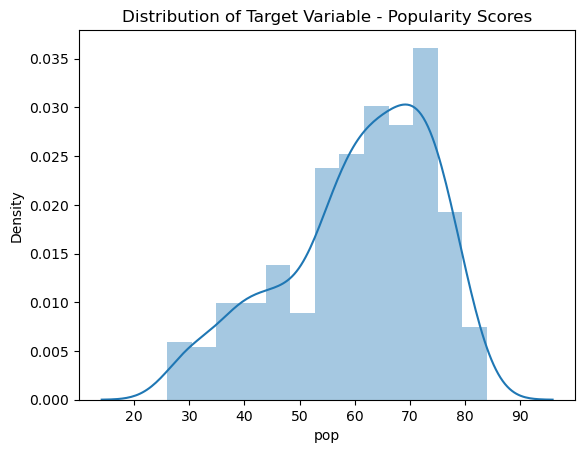

In [9]:
target=spot_reg_origin['pop'] #defining the target variable
sns.distplot(target)
plt.title('Distribution of Target Variable - Popularity Scores')
plt.show()

##### Comment: Observing the distribution of the Popularity feature, the distribution is left skewed

### 3: Check the relationship between all the features

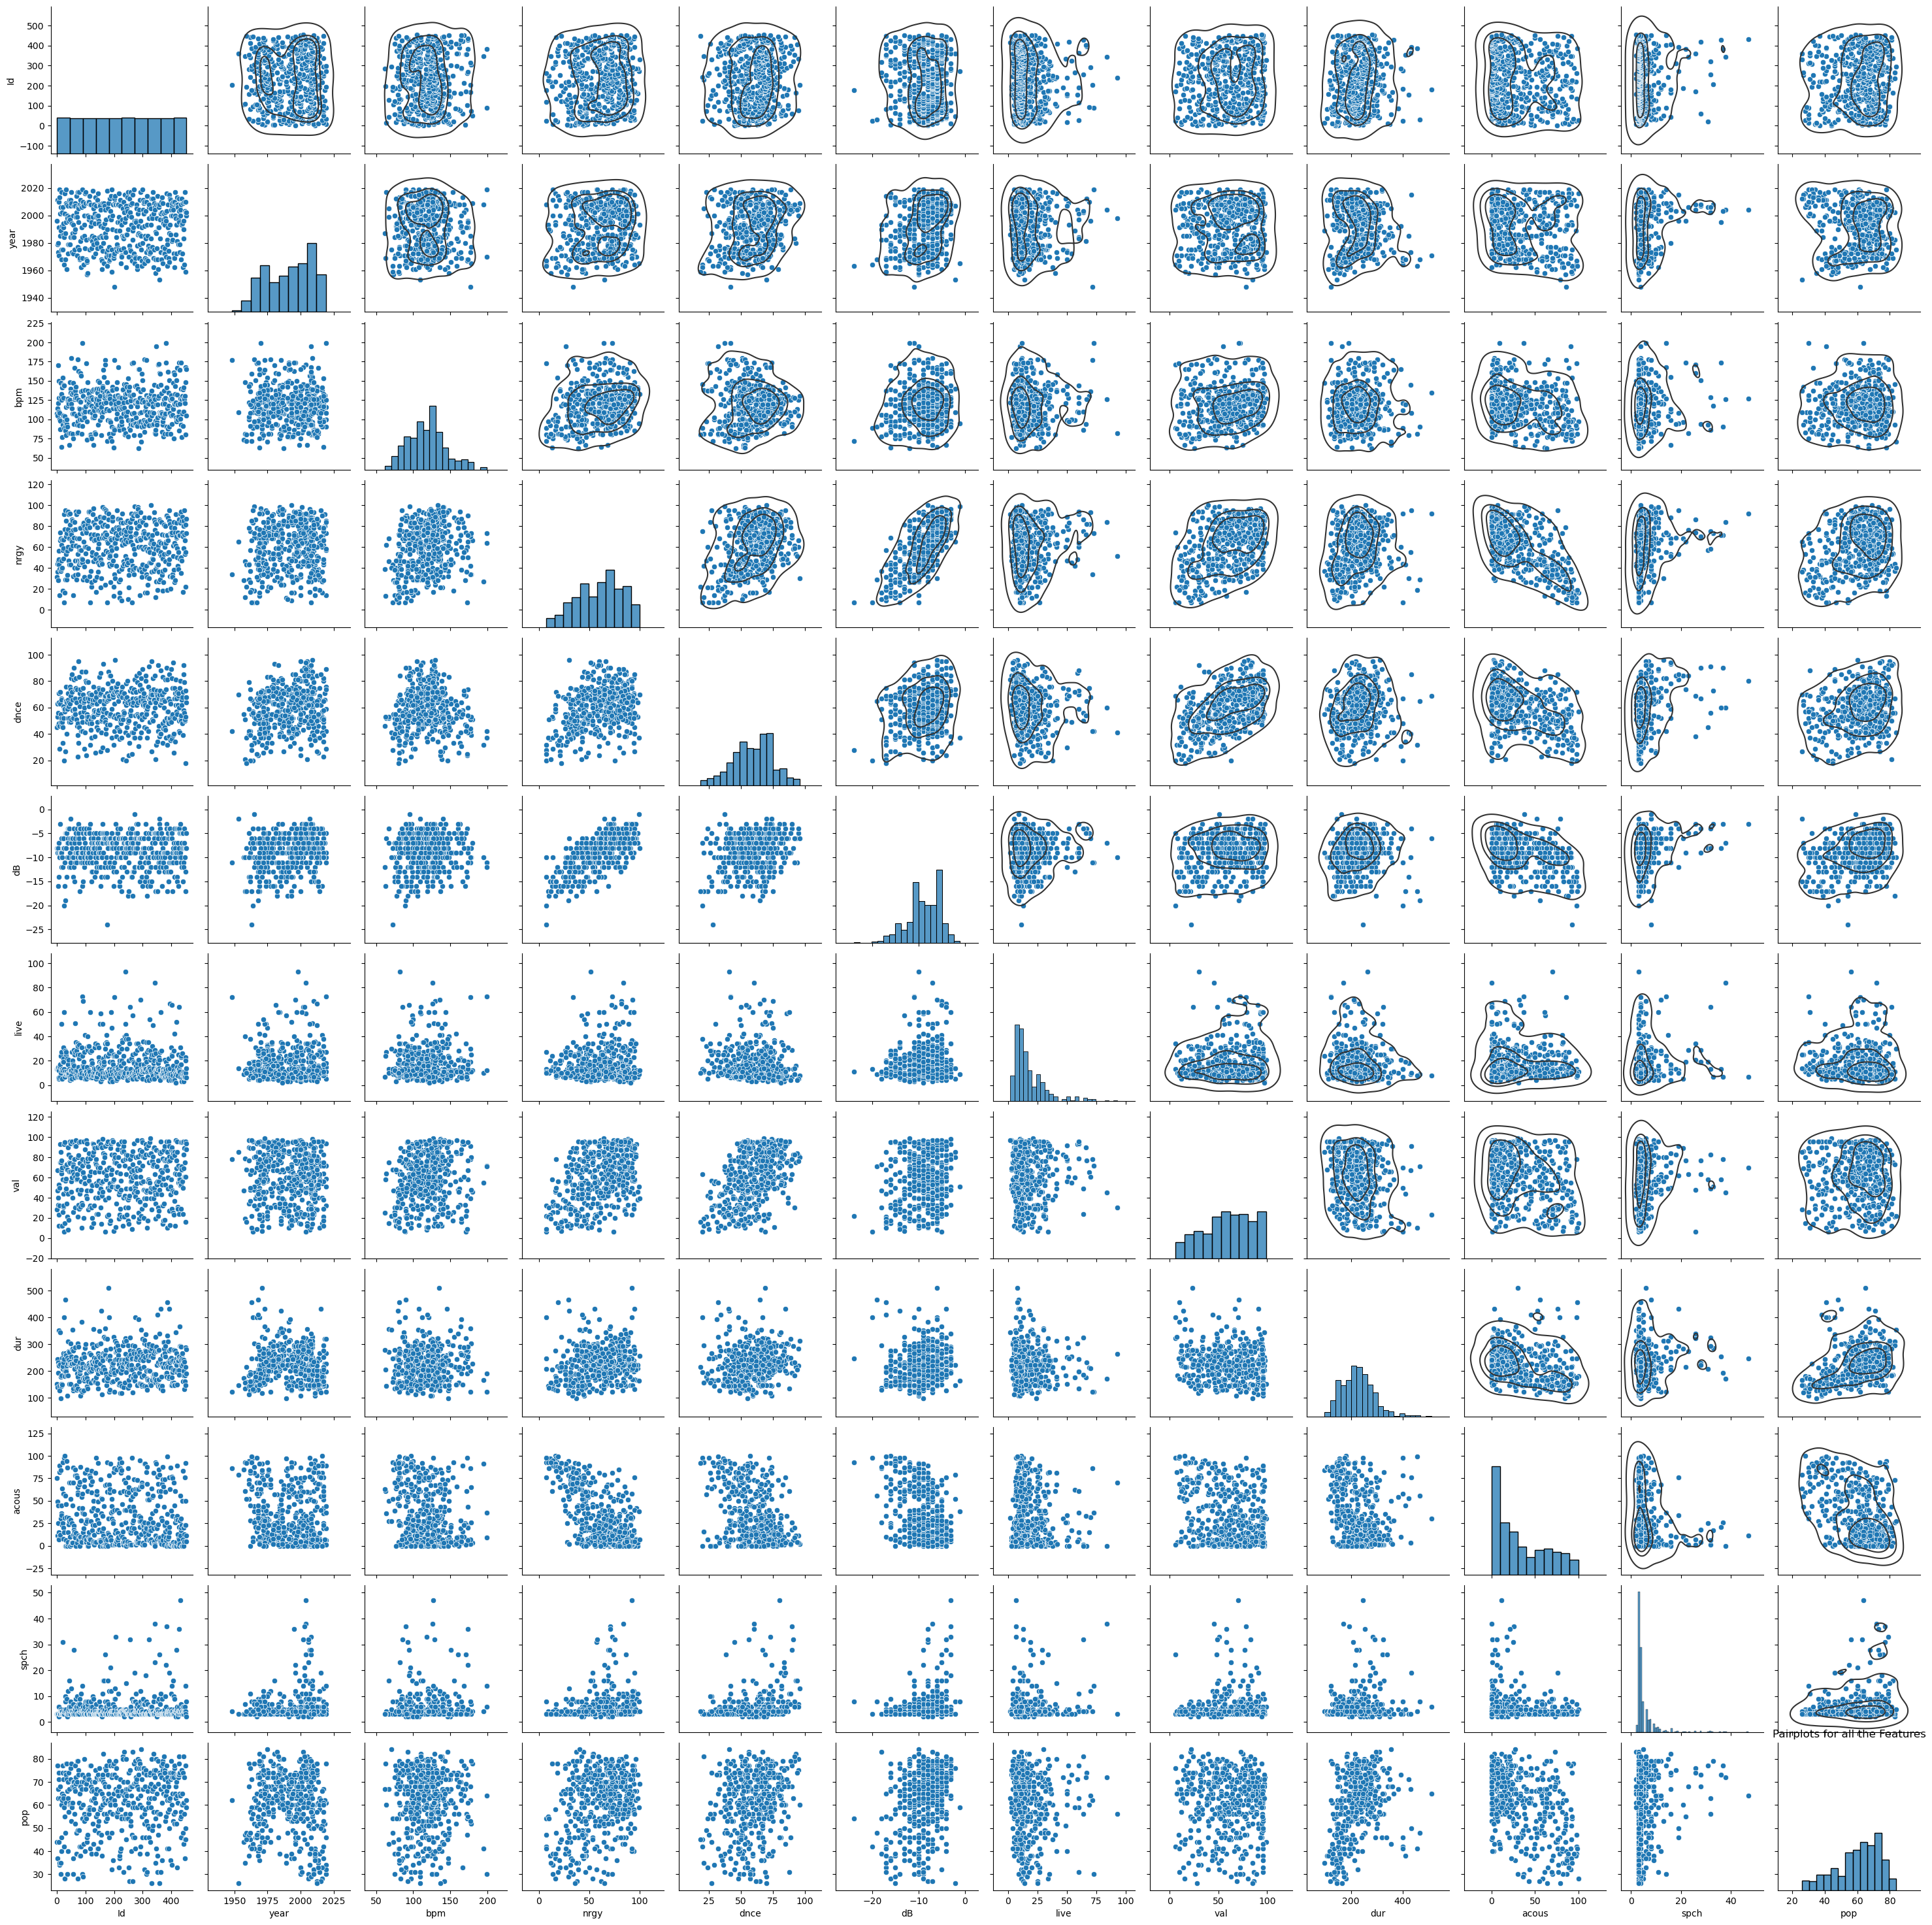

In [10]:
g = sns.pairplot(spot_reg_origin)
plt.title('Pairplots for all the Features')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

##### Comment: It can be observed that some features have linear relationship. The effect of one feature may be dependent on another feature. This will be further checked by observing the correlation between the variables. 

### 4：Correlation between the numerical variables

The relationship between pop and other features are not that strong. However loudness ad energy has high correlation

·There is a strong positive correlation between energy and loudness of the songs

·There are positive correlations between the target variable(pop) and feature variables but they are weak

In [11]:
# Id seems is initial for each song, hence removed from the correlation map.
# 'title', 'artist', 'top genre' are removed since they are categorical value. 
# 'year' is a disputed feature, but it might get less popular when song getting older, hence we keep it to see.

columns=[#'Id','title', 'artist', 'top genre', 
   'year', 'bpm', 'nrgy', 
    'dnce','dB', 'live', 
    'val', 'dur', 
    'acous', 'spch', 'pop']

spot_reg= spot_reg_origin[columns]

In [12]:
corr=spot_reg.corr()

<Axes: >

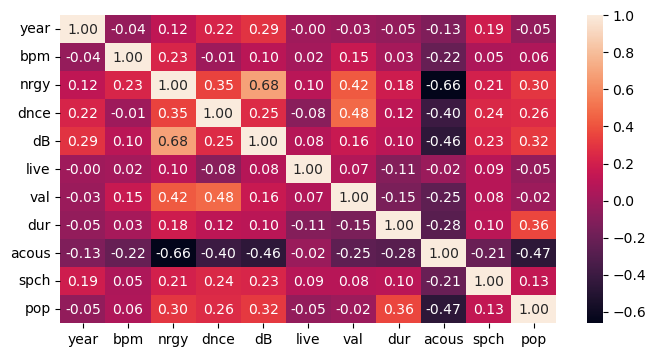

In [13]:
# Correlation heatmap
plt.figure(figsize=(8,4))
# Displaying graph
sns.heatmap(spot_reg.corr(), annot=True, fmt='.2f')

##### Histogram for each features

Text(0.5, 1.0, 'Hisogram plot')

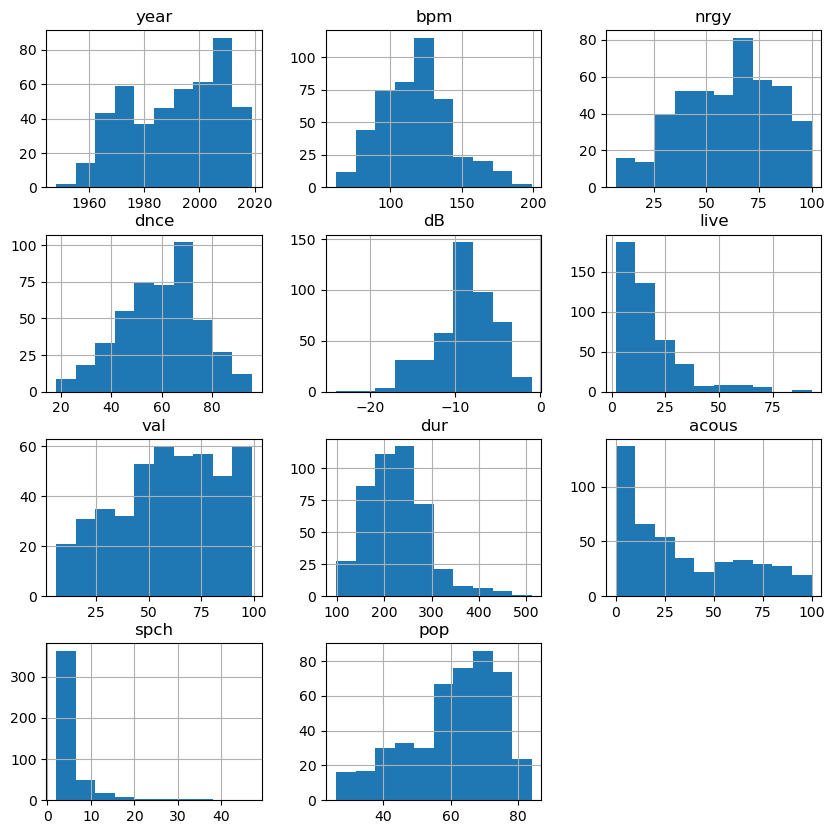

In [14]:
spot_reg.hist(figsize=(10,10))
plt.title("Hisogram plot", size=15, weight='bold')

##### Ploting scatter Plot for loundness and pop


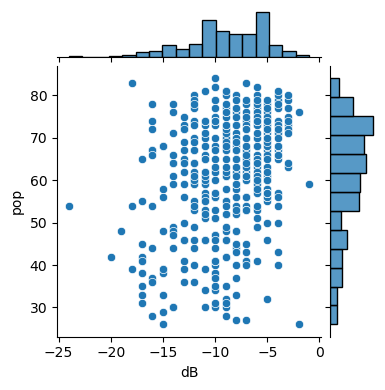

In [15]:
sns.jointplot(x='dB',y='pop',data=spot_reg,kind='scatter',height=4)
plt.show()

##### relation between energy and pop

<Axes: xlabel='nrgy', ylabel='pop'>

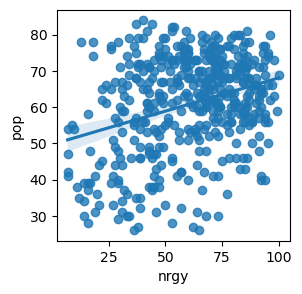

In [16]:
fig=plt.figure(figsize=(3,3))
sns.regplot(data=spot_reg,x='nrgy',y='pop')

##### relation between loundess and pop

<Axes: xlabel='dB', ylabel='pop'>

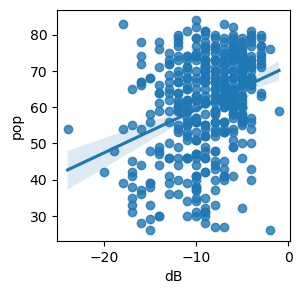

In [17]:
fig=plt.figure(figsize=(3,3))
sns.regplot(data=spot_reg,x='dB',y='pop')

### 5：Observation from EDA

Having observed using graphs and correlation, the relationships between each of the features and target variable were largely non-linear weak.There would be a need to transform the variables and create interactions to deal with the non-linear relationships and weak correlations.

## Chapter 3: Data Preprocessing 

### 1: Handling Missing top genre by predicting from current data

As mentioned above, the feature "top genre" has 15 missing value. We can drop this value directly, but after a comparison of dropping it, keep the "top genre" make our prediction a higher performance by 0.2 points.  
Because the "top genre" is a categorical value, it usually not following the linear relationship.Therefore, we use randomforest and frequency map. We’ve also considered about K-nearest, however it's too sensitive to the noise. 

In [18]:
#predict missing genre with current values
known_genre = spot_reg_origin[spot_reg_origin['top genre'].notnull()]
missing_genre = spot_reg_origin [spot_reg_origin ['top genre'].isnull()]

In [19]:
#prepare training data without catigorical value
X_known_genre = known_genre.drop(['top genre','Id','title', 'artist'], axis=1)
X_unknown_genre = missing_genre.drop(columns=['top genre','Id', 'title', 'artist'])
y_known_genre = known_genre['top genre']
print(X_known_genre)

     year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop
0    1996  107    31    45  -8    13   28  150     75     3   44
2    1979  105    36    63  -9    13   67  245     11     3   77
3    1980  170    28    47 -16    13   33  232     25     3   67
4    1973  121    47    56  -8    15   40  193     45     3   63
5    2010  110    56    71  -7    12   23  223     15     6   74
..    ...  ...   ...   ...  ..   ...  ...  ...    ...   ...  ...
448  1959   80    22    18 -17    10   16  214     92     4   45
449  2010  148    81    53 -13    23   96  147     50     3   50
450  2002  168    55    73  -8    20   61  289     23    14   77
451  2000  165    87    64  -5     6   88  191      5     8   62
452  2002  105    73    68  -8    14   94  281     11     2   59

[438 rows x 11 columns]


In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_known_genre = imputer.fit_transform(X_known_genre)
X_unknown_genre = imputer.transform(X_unknown_genre)

In [21]:
label_encoder = LabelEncoder()
y_known_genre = label_encoder.fit_transform(y_known_genre)
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_known_genre, y_known_genre) #fit the model

RandomForestClassifier(random_state=0)

In [22]:
predicted_genres = classifier.predict(X_unknown_genre) 
predicted_genres = label_encoder.inverse_transform(predicted_genres)
print(predicted_genres)

['adult standards' 'adult standards' 'adult standards' 'adult standards'
 'yodeling' 'adult standards' 'adult standards' 'brill building pop'
 'merseybeat' 'album rock' 'deep adult standards' 'deep adult standards'
 'brill building pop' 'dance pop' 'album rock']


In [23]:
spot_reg_rfc = spot_reg_origin
spot_reg_rfc.loc[spot_reg_origin ['top genre'].isnull(), 'top genre'] = predicted_genres # Fill the predict value back into train_data

In [24]:
print(spot_reg_rfc.isnull().sum()) #check if there still missing vlue in train data 
a = spot_reg_rfc['top genre'].value_counts()
# print(a)
b = a[a<3]
print(b.count())
# train_data_origin.to_csv('updated_dataset.csv', index=False)

Id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64
59


In [25]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = spot_reg_rfc.shape

spot_reg.drop_duplicates(inplace=True)

if spot_reg_rfc.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-spot_reg.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [26]:
#Removal of Outlier
# 35/453 = 7.7% of train data outliners were removed. It's a relatively modest, suggesting that the data cleansing process may remove true outliers without unduly reducing the size of the dataset

from scipy import stats
features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
z_scores = stats.zscore(spot_reg_origin[features])

z_scores_df = pd.DataFrame(z_scores, columns=features, index=spot_reg_origin.index)

rows_without_outliers = (np.abs(z_scores_df) < 3).all(axis=1)

spot_reg_rmo = spot_reg_rfc.loc[rows_without_outliers]
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(spot_reg_rfc.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(spot_reg_rmo.shape[0]))

spot_reg_rmo.head


Inference:
Before removal of outliers, The dataset had 453 samples.
After removal of outliers, The dataset now has 418 samples.


<bound method NDFrame.head of       Id                                        title            artist  \
0      1                                 My Happiness    Connie Francis   
1      2                             Unchained Melody   The Teddy Bears   
2      3                        How Deep Is Your Love          Bee Gees   
3      4                                Woman in Love  Barbra Streisand   
4      5  Goodbye Yellow Brick Road - Remastered 2014        Elton John   
..   ...                                          ...               ...   
448  449                               But Not For Me   Ella Fitzgerald   
449  450                                    Surf City        Jan & Dean   
450  451                                      Dilemma             Nelly   
451  452                             It's Gonna Be Me            *NSYNC   
452  453                              In The Army Now        Status Quo   

              top genre  year  bpm  nrgy  dnce  dB  live  val  dur  a

### 2: Convert "top genre" to numerical value
Since it's still categorical value and we need to use it in our model, we've transform it into numerical value in order to fit into the model. Here are methods we considered when doing this process and the reasons we choose frequency:  
1: One-Hot Encoding, the category in train and test data set are not perfectly match, and there are too many categories "genre" comparing to the dataset.  
2: Lable Encoding: too many catories in "genre" which might missleading that they have a relationship in order.Same in Binary Encoding.  
Thus, we decide to use frequency to represent the category of each genre, and use the mean of genre for those new in test data.


In [27]:
frequency = spot_reg_rmo['top genre'].value_counts(normalize=True)  # Getting the frequency
print(frequency.head())

adult standards       0.172249
album rock            0.153110
dance pop             0.136364
brill building pop    0.038278
glam rock             0.038278
Name: top genre, dtype: float64


In [28]:
normalized_value_for_once = 1 / len(spot_reg_rmo)
print(normalized_value_for_once)

0.0023923444976076554


In [29]:
spot_reg_update = spot_reg_rmo
spot_reg_update['top genre'] = spot_reg_rmo['top genre'].map(frequency)

In [30]:
spot_reg_update['top genre'].value_counts()

0.172249    72
0.153110    64
0.136364    57
0.002392    40
0.038278    32
0.004785    30
0.014354    24
0.009569    16
0.011962    15
0.033493    14
0.016746    14
0.031100    13
0.023923    10
0.007177     9
0.019139     8
Name: top genre, dtype: int64

In [31]:
spot_reg_update['top genre'].head
spot_reg_update['top genre'].mean() # get the mean for the freqency of genre from train and fill it to the new value in test

0.080572789084499

In [32]:
test_data_origin = pd.read_csv("CS98XRegressionTest.csv") #Loading test set
test_data_origin.head()

Id                                              title  \
0  454                                            Pump It   
1  455  Circle of Life - From "The Lion King"/Soundtra...   
2  456             We Are The Champions - Remastered 2011   
3  457                              Insomnia - Radio Edit   
4  458                                This Eve of Parting   

                artist         top genre  year  bpm  nrgy  dnce  dB  live  \
0  The Black Eyed Peas         dance pop  2005  154    93    65  -3    75   
1           Elton John         glam rock  1994  161    39    30 -15    11   
2                Queen         glam rock  1977   64    46    27  -7    12   
3            Faithless          big beat  2010  127    92    71  -9    37   
4        John Hartford  appalachian folk  2018  115    46    56 -12    21   

   val  dur  acous  spch  
0   74  213      1    18  
1   14  292     26     3  
2   18  179     38     3  
3   53  216      6     4  
4   34  153     18     3

In [33]:
test_data = test_data_origin
test_data['top genre'] = test_data_origin['top genre'].map(frequency)

In [34]:
print(test_data)

      Id                                              title  \
0    454                                            Pump It   
1    455  Circle of Life - From "The Lion King"/Soundtra...   
2    456             We Are The Champions - Remastered 2011   
3    457                              Insomnia - Radio Edit   
4    458                                This Eve of Parting   
..   ...                                                ...   
109  563                                         Candy Shop   
110  564                Dragostea Din Tei - Italian Version   
111  565                          Big Poppa - 2005 Remaster   
112  566                       YMCA - Original Version 1978   
113  567                                 Livin' On A Prayer   

                   artist  top genre  year  bpm  nrgy  dnce  dB  live  val  \
0     The Black Eyed Peas   0.136364  2005  154    93    65  -3    75   74   
1              Elton John   0.038278  1994  161    39    30 -15    11   14   
2        

In [35]:
test_data.isnull().sum()

Id            0
title         0
artist        0
top genre    16
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
dtype: int64

##### There are 16 genre value missing in test set, this is because they are new value and different with genres appears on train dataset. Thus, to limit their influence to the model fit, we use a mean of the frequency.

In [36]:
# default_frequency = frequency.mean()  # or median
default_frequency = normalized_value_for_once
test_data['top genre'].fillna(default_frequency, inplace=True)

In [37]:
# test_data['top genre'] = test_data['top genre'].astype(int)

test_data['top genre'].head

<bound method NDFrame.head of 0      0.136364
1      0.038278
2      0.038278
3      0.002392
4      0.002392
         ...   
109    0.002392
110    0.016746
111    0.002392
112    0.014354
113    0.004785
Name: top genre, Length: 114, dtype: float64>

In [38]:
#test_data.isnull().sum()

## Chapter 4: Model Building and Evaluation based on Train Data

This section will build the model using three regression models and a non-regression model. We've done 2 sections of feature fitting conditions. The first condition is predict using features that shows correlation greater than 0.2 (corr>=0.2), and the second condition is utilize all the features (including modified "top genre). After evaluation based on the kaggle competition, we choosed the second one since it has better performance.

    .Linear regression

    .Random Forest Regression

    .Ridge Regression



### 1: First Condition: features where corr >= 0.2)

the features that fall into this category are ' acous, nrgy, dB, dur'

In [39]:
#Definging target features and independent feature
X = spot_reg_update[['acous','nrgy', 'dB', 'dur']]
y = spot_reg_update['pop']

In [40]:
# Splitting the "train "data into Train and Test Data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train1.shape) 
print(X_test1.shape)

(313, 4)
(105, 4)


#### *Using standard scaler on this project will cause a result with RMSE score 300+, this might because of the dataset has a strong skewed distribution and weak linear relationship. So we give up on this part. And this is the reason why our prediction it not accruate as wishes.* 

In [41]:
# scaler = StandardScaler() 
# scaler.fit(X_train1) 
# X_train1 = scaler.transform(X_train1) 
# X_test1 = scaler.transform(X_test1)

#### Import our model

##### -Multiple Linear Regression
Linear regression in machine learning measures the extent to which the dependent variable changes in response to variations in the independent variable.The primary benefit of linear regression models lies in their adherence to linearity. 

Although this data set has weak linear relationship, we still use the linear regression since the estimation technique is simplified, and, crucially, these linear equations have a clear interpretation at a modular level.

In [42]:
model_train = LinearRegression()
model_train.fit(X_train1, y_train1)

LinearRegression()

##### -Random Forest Regression

The Random Forest technique is widely used in machine learning for problems including classification and regression. It is favored for its exceptional accuracy, resilience, ability to determine feature relevance, versatility, and scalability. Random Forest mitigates overfitting by aggregating numerous decision trees and exhibits reduced susceptibility to noise and outliers within the dataset.


In [43]:
RF_model_train = RandomForestRegressor(random_state=1)
RF_model_train.fit(X_train1, y_train1)

RandomForestRegressor(random_state=1)

##### -Ridge Regression
Ridge regression is a method of statistical regularization. It mitigates the problem of overfitting in machine learning models by adjusting the training data.


In [44]:
ridge_model_train = Ridge(alpha = 0.1)
ridge_model_train.fit(X_train1, y_train1)

Ridge(alpha=0.1)

##### -Gradient Boosting Regression
Gradient Boosting Regression is used, it's another ensemble learning approach that improves prediction performance by progressively optimizing decision tree.

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

GBM_model_train = GradientBoostingRegressor(random_state=1)

GBM_model_train.fit(X_train1, y_train1)

GradientBoostingRegressor(random_state=1)

##### -Support Vector Machine Regression
Support Vector Machine Regression another method which is very good with dealing non-linear relationship dataset. Data in high dimensional may be processed efficiently which seems good with this data set.

In [46]:
from sklearn.svm import SVR

SVM_model_train = SVR(kernel='rbf')  # 核函数选择径向基函数（RBF）

SVM_model_train.fit(X_train1, y_train1)

SVR()

#### Get the RMSE score of our model (4 features)

In [47]:
from math import sqrt

# define a method claculating rmse
def calculate_rmse(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    return sqrt(mse)

# Models we are going to use
models = {
    'Linear Regression': model_train,
    'Random Forest': RF_model_train,
    'Ridge Regression': ridge_model_train,
    'Gradient Boosting Regression': GBM_model_train,
    'SVM':SVM_model_train
}

# Train and Test data split from our "Train" data set
data = {
    'Train': (X_train1, y_train1),
    'Test': (X_test1, y_test1)
}

for model_name, model in models.items():
    for data_name, (X, y) in data.items():
        y_pred = model.predict(X)
        rmse = calculate_rmse(y, y_pred)
        print(f'{model_name} {data_name} RMSE:', rmse)


Linear Regression Train RMSE: 11.320664546626867
Linear Regression Test RMSE: 11.115794786383182
Random Forest Train RMSE: 4.208457899441766
Random Forest Test RMSE: 11.546213067082913
Ridge Regression Train RMSE: 11.32066454693028
Ridge Regression Test RMSE: 11.115796190114054
Gradient Boosting Regression Train RMSE: 6.576248923550814
Gradient Boosting Regression Test RMSE: 12.088864125790405
SVM Train RMSE: 11.24923257297087
SVM Test RMSE: 11.113968216029326


### 2: Second Condition: All numerical features including updated genre


In [48]:
columns=[#'Id','title', 'artist', 'year', 'pop'
      'top genre', 'bpm', 'nrgy', 
    'dnce','dB', 'live', 
    'val', 'dur', 
    'acous', 'spch']

In [49]:
X_all = spot_reg_update[columns]
y_all = spot_reg_update['pop']

In [50]:
# Splitting the "train"data into Train and Test Data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all,y_all, test_size=0.25, random_state=42)
print(X_train2.shape) 
print(X_test2.shape)

(313, 10)
(105, 10)


#### Import the trainer

In [51]:
model_train_all = LinearRegression()
model_train_all.fit(X_train2, y_train2)

RF_model_train_all = RandomForestRegressor(random_state=0)
RF_model_train_all.fit(X_train2, y_train2)

ridge_model_train_all = Ridge()
ridge_model_train_all.fit(X_train2, y_train2)

GBM_model_train_all = GradientBoostingRegressor(random_state=1)
GBM_model_train_all.fit(X_train2, y_train2)

SVM_model_train_all = SVR(kernel='rbf')  
SVM_model_train_all.fit(X_train2, y_train2)

SVR()

In [52]:
def calculate_rmse_all(true_values_all, predicted_values_all):
    mse_all = mean_squared_error(true_values_all, predicted_values_all)
    return sqrt(mse_all)

# Models we are going to use
models = {
    'Linear Regression': model_train_all,
    'Random Forest': RF_model_train_all,
    'Ridge Regression': ridge_model_train_all,
    'Gradient Boosting Regression': GBM_model_train_all,
    'SVM':SVM_model_train_all
}

# Train and Test data split from our "Train" data set
data = {
    'Train': (X_train2, y_train2),
    'Test': (X_test2, y_test2)
}

for model_name, model in models.items():
    for data_name, (X, y) in data.items():
        y_pred = model.predict(X)
        rmse = calculate_rmse(y, y_pred)
        print(f'{model_name} {data_name} RMSE_all:', rmse)


Linear Regression Train RMSE_all: 11.092040257494807
Linear Regression Test RMSE_all: 11.057857076962172
Random Forest Train RMSE_all: 4.187894886249506
Random Forest Test RMSE_all: 11.309027704407114
Ridge Regression Train RMSE_all: 11.092587257985999
Ridge Regression Test RMSE_all: 11.08207862681124
Gradient Boosting Regression Train RMSE_all: 5.3207913863450305
Gradient Boosting Regression Test RMSE_all: 12.61797362990965
SVM Train RMSE_all: 11.436290489107483
SVM Test RMSE_all: 11.37862392575391


### 3: Summery on TrainModel Evaluation

The model performance indexes of two sets of different feature sets are the model based on four features and the model based on all feature and all the root-mean-square errors (RMSE) for linear regression, random forest, ridge regression models, Gradient Boosting and SVM on the training and test data based on "train" dataset are shown above. 

·From the data above, linear regression, ridge regression and SVM show better consistency across the 4 features and all features, although their error is slightly higher than that of the random forest model.  
·Random Forest and Gradient Boosting performs similer, while Random Forest is better on both training and testing set. Although it performs slightly worse on the test set other than above model. However, it is important to note that the test RMSE of the random forest model is slightly lower when all features are used than when only four features are used, suggesting that the model may generalize better in this case.  

Because we are more focused on achieving the lowest possible training error and can accept slightly more complex models, random forests (especially versions that use all features) may be a better choice. 

## Chapter 5: Prediction on kaggle Test Data

We have evaluated the RMSE using both a subset of four significant features and all numerical features across Linear, Random Forest, Ridge regression Gradient Boosting and SVM models. Our assessments indicate that utilizing all numerical features yields better prediction accuracy compared to using only the four selected features. Among the models tested, the random forest model demonstrated superior performance. Consequently, we have decided to employ the random forest model for our predictions on the test dataset.

In [53]:
columns_test=[#'Id','title', 'artist', 'year'
      'top genre', 'bpm', 'nrgy', 
    'dnce','dB', 'live', 
    'val', 'dur', 
    'acous', 'spch', 'pop']

In [54]:
spot_reg_train =spot_reg_update[columns_test]
spot_reg_train.shape

# spot_reg_train =spot_reg_update[['acous','nrgy', 'dB', 'dur']]
# spot_reg_train.shape 

(418, 11)

In [55]:
spot_reg_train.describe()

top genre         bpm        nrgy        dnce          dB        live  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     0.080573  117.904306   59.686603   59.578947   -8.877990   16.210526   
std      0.070634   24.039544   21.943788   15.085678    3.406433   10.548901   
min      0.002392   62.000000    7.000000   18.000000  -18.000000    2.000000   
25%      0.011962  100.000000   43.000000   50.000000  -11.000000    9.000000   
50%      0.038278  119.000000   62.000000   61.500000   -9.000000   12.000000   
75%      0.153110  133.000000   77.750000   70.000000   -6.000000   22.000000   
max      0.172249  180.000000  100.000000   96.000000   -1.000000   59.000000   

              val         dur       acous        spch         pop  
count  418.000000  418.000000  418.000000  418.000000  418.000000  
mean    59.569378  222.779904   33.019139    4.803828   60.586124  
std     24.391417   57.883322   29.309391    2.970645   13.472007  
min      7.000000   98.000000    0.000000    2.000000   26.000000  
25%     42.000000  179.000000    7.000000    3.000000   53.000000  
50%     61.000000  221.000000   24.000000    4.000000   63.000000  
75%     80.000000  258.000000   58.750000    5.000000   71.000000  
max     99.000000  411.000000  100.000000   22.000000   84.000000

In [56]:
#Definging target features and independent feature
X_train = spot_reg_train.drop(['pop'], axis=1)
y_train = spot_reg_train['pop']


# #Definging target features and independent feature
# X_train = spot_reg_train
# y_train = spot_reg_update['pop']

In [57]:
# Check the data structure for feature selection
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         114 non-null    int64  
 1   title      114 non-null    object 
 2   artist     114 non-null    object 
 3   top genre  114 non-null    float64
 4   year       114 non-null    int64  
 5   bpm        114 non-null    int64  
 6   nrgy       114 non-null    int64  
 7   dnce       114 non-null    int64  
 8   dB         114 non-null    int64  
 9   live       114 non-null    int64  
 10  val        114 non-null    int64  
 11  dur        114 non-null    int64  
 12  acous      114 non-null    int64  
 13  spch       114 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 12.6+ KB


In [58]:
X_test = test_data.drop(['Id','title','artist', 'year'#,'live'
                        ], axis=1, errors='ignore')

# X_test = test_data[['acous','nrgy', 'dB', 'dur']]

In [59]:
# scaler = StandardScaler() 
# scaler.fit(X_train) 
# X_train = scaler.transform(X_train) 
# X_test = scaler.transform(X_test)


### Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
# predict with test data
predictionsRNF = model.predict(X_test)

output = pd.DataFrame({'Id': test_data['Id'], 'pop': predictionsRNF})
output.to_csv('RndFor.csv', index=False)

#  Chapter 6: Analysis Summary and Model Comparison

The Root Mean Squared Error (RMSE) is used as the metric to evaluate the effectiveness of the regression models employed in this analysis. This is a primary metric used to evaluate the effectiveness of a regression model. The metric quantifies the mean discrepancy between the projected values generated by a model and the actual observed values. It offers an assessment of the model's ability to accurately forecast the target value. A low root mean square error (RMSE) indicates that the model is capable of making highly precise predictions and effectively fitting the data. In contrast, higher values indicate a greater number of substantial errors and a reduced number of precise predictions. This simply means the lower the RMSE, the higher the effectiveness

This analysis employed three regression models and evaluated the performance of all three for both train set and test set under two conditions. The first condition used four selected features which appeared to be better correlated with the target feature. the second condition used all the features present in the dataset.

# CLASSIFICATION PROBLEM

## Chapter 1 Project Overview

The objectives of this calssification assignment are to implement the concepts taught in lectures, apply them to an spotify dataset and predict song genres based on the given data.


### Data Description



#### Importing neccessary Libraries

In [62]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [63]:
#Importing Data
clas_dat_origin = pd.read_csv('CS98XClassificationTrain.csv') 
clas_dat_origin.head

<bound method NDFrame.head of       Id                                        title            artist  year  \
0      1                                 My Happiness    Connie Francis  1996   
1      2                             Unchained Melody   The Teddy Bears  2011   
2      3                        How Deep Is Your Love          Bee Gees  1979   
3      4                                Woman in Love  Barbra Streisand  1980   
4      5  Goodbye Yellow Brick Road - Remastered 2014        Elton John  1973   
..   ...                                          ...               ...   ...   
448  449                               But Not For Me   Ella Fitzgerald  1959   
449  450                                    Surf City        Jan & Dean  2010   
450  451                                      Dilemma             Nelly  2002   
451  452                             It's Gonna Be Me            *NSYNC  2000   
452  453                              In The Army Now        Status Quo  2002  

In [64]:
clas_dat_origin.shape

(453, 15)

##### Comment: The  dataset consist of 453 rows and 15 columns.

## Chapter 2: Descriptive Analysis

### 1: Data types and summary statistics

Before getting into data preprocessing, we need to take a look on the data structures. From summary stastistics, there are some points need to be care:  
1: The distribution for this dataset is wide ranged.  
2: There are 15 missing value on "top genre".  
3: On counting the types of genre, there are 86 kinds where many of them have only occured once.
4: Value "dB" is ranged from -1 to -25, which might cause problem when handling. Thus we've converted by +25 scale.

In [65]:
# Check for missing values
print(clas_dat_origin.isnull().sum())

# Explore data types and summary statistics
print(clas_dat_origin.info())
print(clas_dat_origin.describe())

# For categorical data, see how many categories there are
print(clas_dat_origin['top genre'].value_counts())

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  43

In [66]:
# Converting Loudness to postive 25 scale.
clas_dat_origin['dB'] = 25 + clas_dat_origin['dB']
clas_dat_origin['dB'].head(10)

0    17
1    17
2    16
3     9
4    17
5    18
6    11
7    16
8    15
9    15
Name: dB, dtype: int64

## Chapter 3 Handling Missing Value

The linear relationship for this dataset is pretty week, which leads to a number of outliers, and there are 15 missing genre.
Since we are predicting genre, we have two method:  
1: Drop the missing row, and when droping outliers, the rows missing genre will be dropped too.  
2: Predict missing genre through the current data.Which is not adopt in the final prediction since we were using frequency map and it causing bias on the training data.

### 1： Removal of Outlier

In [67]:
# 35/453 = 7.7% of train data outliners were removed. It's a relatively modest, suggesting that the data cleansing process may remove true outliers without unduly reducing the size of the dataset

from scipy import stats
features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
z_scores = stats.zscore(clas_dat_origin[features])

z_scores_df = pd.DataFrame(z_scores, columns=features, index=clas_dat_origin.index)

rows_without_outliers = (np.abs(z_scores_df) < 3).all(axis=1)

clas_dat_drop = clas_dat_origin.loc[rows_without_outliers]
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(clas_dat_drop.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(clas_dat_drop.shape[0]))

clas_dat_drop.head


Inference:
Before removal of outliers, The dataset had 418 samples.
After removal of outliers, The dataset now has 418 samples.


<bound method NDFrame.head of       Id                                        title            artist  year  \
0      1                                 My Happiness    Connie Francis  1996   
1      2                             Unchained Melody   The Teddy Bears  2011   
2      3                        How Deep Is Your Love          Bee Gees  1979   
3      4                                Woman in Love  Barbra Streisand  1980   
4      5  Goodbye Yellow Brick Road - Remastered 2014        Elton John  1973   
..   ...                                          ...               ...   ...   
448  449                               But Not For Me   Ella Fitzgerald  1959   
449  450                                    Surf City        Jan & Dean  2010   
450  451                                      Dilemma             Nelly  2002   
451  452                             It's Gonna Be Me            *NSYNC  2000   
452  453                              In The Army Now        Status Quo  2002  

### 2： Predict the Missing value through frequency map

In addressing the challenge of missing values within our dataset, particularly concerning the "top genre" attribute, we initially contemplated employing a frequency-based imputation strategy. But after evaluating the entire project, we found that this frequency mapping was too random, since our goal was also to predict genres. This means that if you use frequency to fill in missing values, you may introduce bias into the data used by the training model. Therefore, we decided to use the other ways to deal with missing values and avoid introducing bias in the model training process.

## Chapter 4: Exploratory Data Analysis
Before getting into modeling, Let's get a deeper understanding of the relationship between the target variabe and feature variables, as well as a better grasp on how the features relate to one another.

In [68]:
# Finding duplicate rows
dupl_rows = clas_dat_drop[clas_dat_drop.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = dupl_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
dupl_rows

Number of duplicate rows: 0


Empty DataFrame
Columns: [Id, title, artist, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop, top genre]
Index: []

In [69]:
# Get the number of unique values in each column
unique_valcount = clas_dat_drop.nunique()
#unique_valcount = clas_dat_update.nunique()
unique_valcount

Id           418
title        416
artist       317
year          63
bpm          105
nrgy          90
dnce          73
dB            18
live          48
val           93
dur          187
acous         93
spch          19
pop           59
top genre     80
dtype: int64

In [70]:
genre_counts = clas_dat_drop['top genre'].value_counts()
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']
genre_counts_df

Genre  Count
0      adult standards     66
1           album rock     62
2            dance pop     56
3            glam rock     16
4   brill building pop     15
..                 ...    ...
75  british dance band      1
76          drone folk      1
77             bow pop      1
78     australian rock      1
79    alternative rock      1

[80 rows x 2 columns]

In [71]:
# single_song_genres = genre_counts[genre_counts == 1]
# print(single_song_genres.index.tolist())

# low_song_genres = genre_counts[genre_counts == 2]
# print(low_song_genres.index.tolist())

In [72]:
# Groupping the low frequency genre and they group them into a large group by there characters.But not adopted in the final model since it might cause bias

# genre_mapping = {
#     'blues': ['acoustic blues', 'louisiana blues', 'british blues'],
#     'metal': ['alternative metal', 'glam metal'],
#     'rock': ['german alternative rock', 'rock-and-roll', 'australian rock', 'alternative rock', 
#              'celtic rock', 'classic rock', 'country rock', 'uk garage', 'blues rock','merseybeat'],
#     'folk': ['canadian folk', 'american folk revival', 'drone folk', 'british folk', 
#              'latin', 'yodeling', 'boogaloo', 'afrobeat'],
#     'pop':['afropop','baroque pop','hip pop','bubblegum pop','classic danish pop','italian pop','bow pop','canadian pop','art pop','belgian pop', 'country','classic girl group', 'neo mellow', 'chicago soul', 'britpop', 'classic uk pop',  'new wave pop','europop',  'british invasion', 'bubblegum dance', 'barbadian pop', 'boy band','chicago rap'],
#     'dance pop':[ 'belgian dance',  'german dance', 'british dance band'],
#     'hip hop':[  'atl hip hop', 'east coast hip hop',  'detroit hip hop'],
#     'funk':[ 'brit funk','g funk'],
#     'disco':['hi-nrg',  'big room', 'deep house','disco house', 'eurodance'],
#     'jazz':[  'mellow gold','bebop'],
#     'others':[ 'bubble trance', 'british comedy','permanent wave', 'chanson'],
#     'dance rock':[  'art rock',  'soft rock'],
#     'adult standards':[  'deep adult standards'],
#     'soul':['british soul','classic soul'],
# }


# for main_genre, subgenres in genre_mapping.items():
#     for subgenre in subgenres:
#         clas_dat_drop['top genre'] = clas_dat_drop['top genre'].replace(subgenre, main_genre)
# print(clas_dat_drop['top genre'].value_counts())

Text(0.5, 1.0, 'Genre')

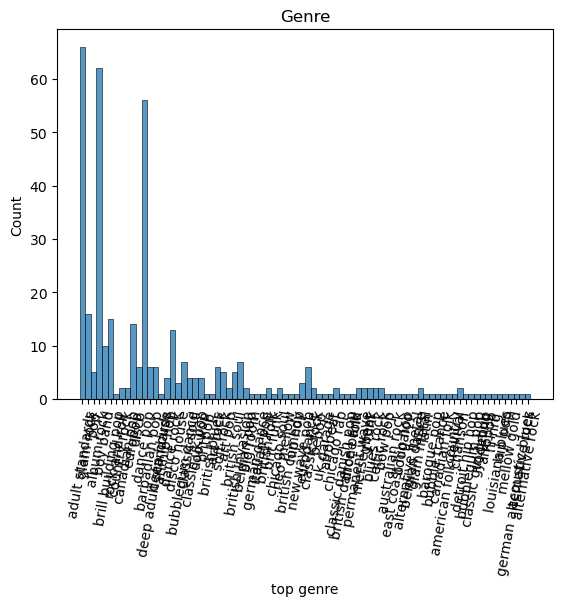

In [73]:
ax = sns.histplot(clas_dat_drop['top genre'])
plt.xticks(rotation=800)
plt.title("Genre")

In [74]:
clas_dat_drop.describe()

Id         year         bpm        nrgy        dnce  \
count  418.000000   418.000000  418.000000  418.000000  418.000000   
mean   224.454545  1991.270335  117.904306   59.686603   59.578947   
std    130.092161    16.663437   24.039544   21.943788   15.085678   
min      1.000000  1953.000000   62.000000    7.000000   18.000000   
25%    112.250000  1976.000000  100.000000   43.000000   50.000000   
50%    224.500000  1993.000000  119.000000   62.000000   61.500000   
75%    332.750000  2007.000000  133.000000   77.750000   70.000000   
max    453.000000  2019.000000  180.000000  100.000000   96.000000   

               dB        live         val         dur       acous        spch  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean    16.122010   16.210526   59.569378  222.779904   33.019139    4.803828   
std      3.406433   10.548901   24.391417   57.883322   29.309391    2.970645   
min      7.000000    2.000000    7.000000   98.000000    0.000000    2.000000   
25%     14.000000    9.000000   42.000000  179.000000    7.000000    3.000000   
50%     16.000000   12.000000   61.000000  221.000000   24.000000    4.000000   
75%     19.000000   22.000000   80.000000  258.000000   58.750000    5.000000   
max     24.000000   59.000000   99.000000  411.000000  100.000000   22.000000   

              pop  
count  418.000000  
mean    60.586124  
std     13.472007  
min     26.000000  
25%     53.000000  
50%     63.000000  
75%     71.000000  
max     84.000000

In [75]:
columns=[#'Id','title', 'artist', 'top genre', 
      'year','bpm', 'nrgy', 
    'dnce','dB', 'live', 
    'val', 'dur', 
    'acous', 'spch', 'pop']

<Axes: >

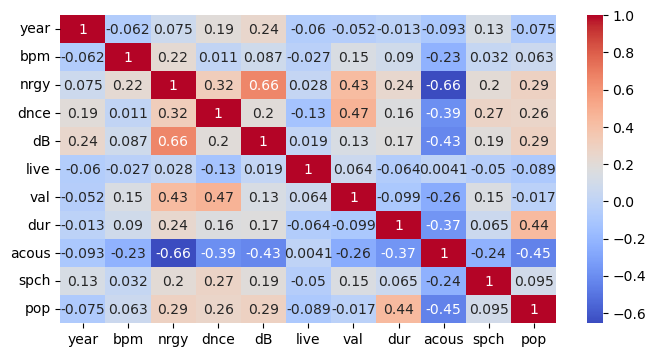

In [76]:
corr=clas_dat_drop[columns].corr()
# corr=clas_dat_update.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr,cmap="coolwarm",annot=True)

In [77]:
X = clas_dat_drop.drop(columns=['Id', 'title','artist','year','top genre'
                               ])

y = clas_dat_drop["top genre"]
numerical_columns = X.select_dtypes(include=['number']).columns

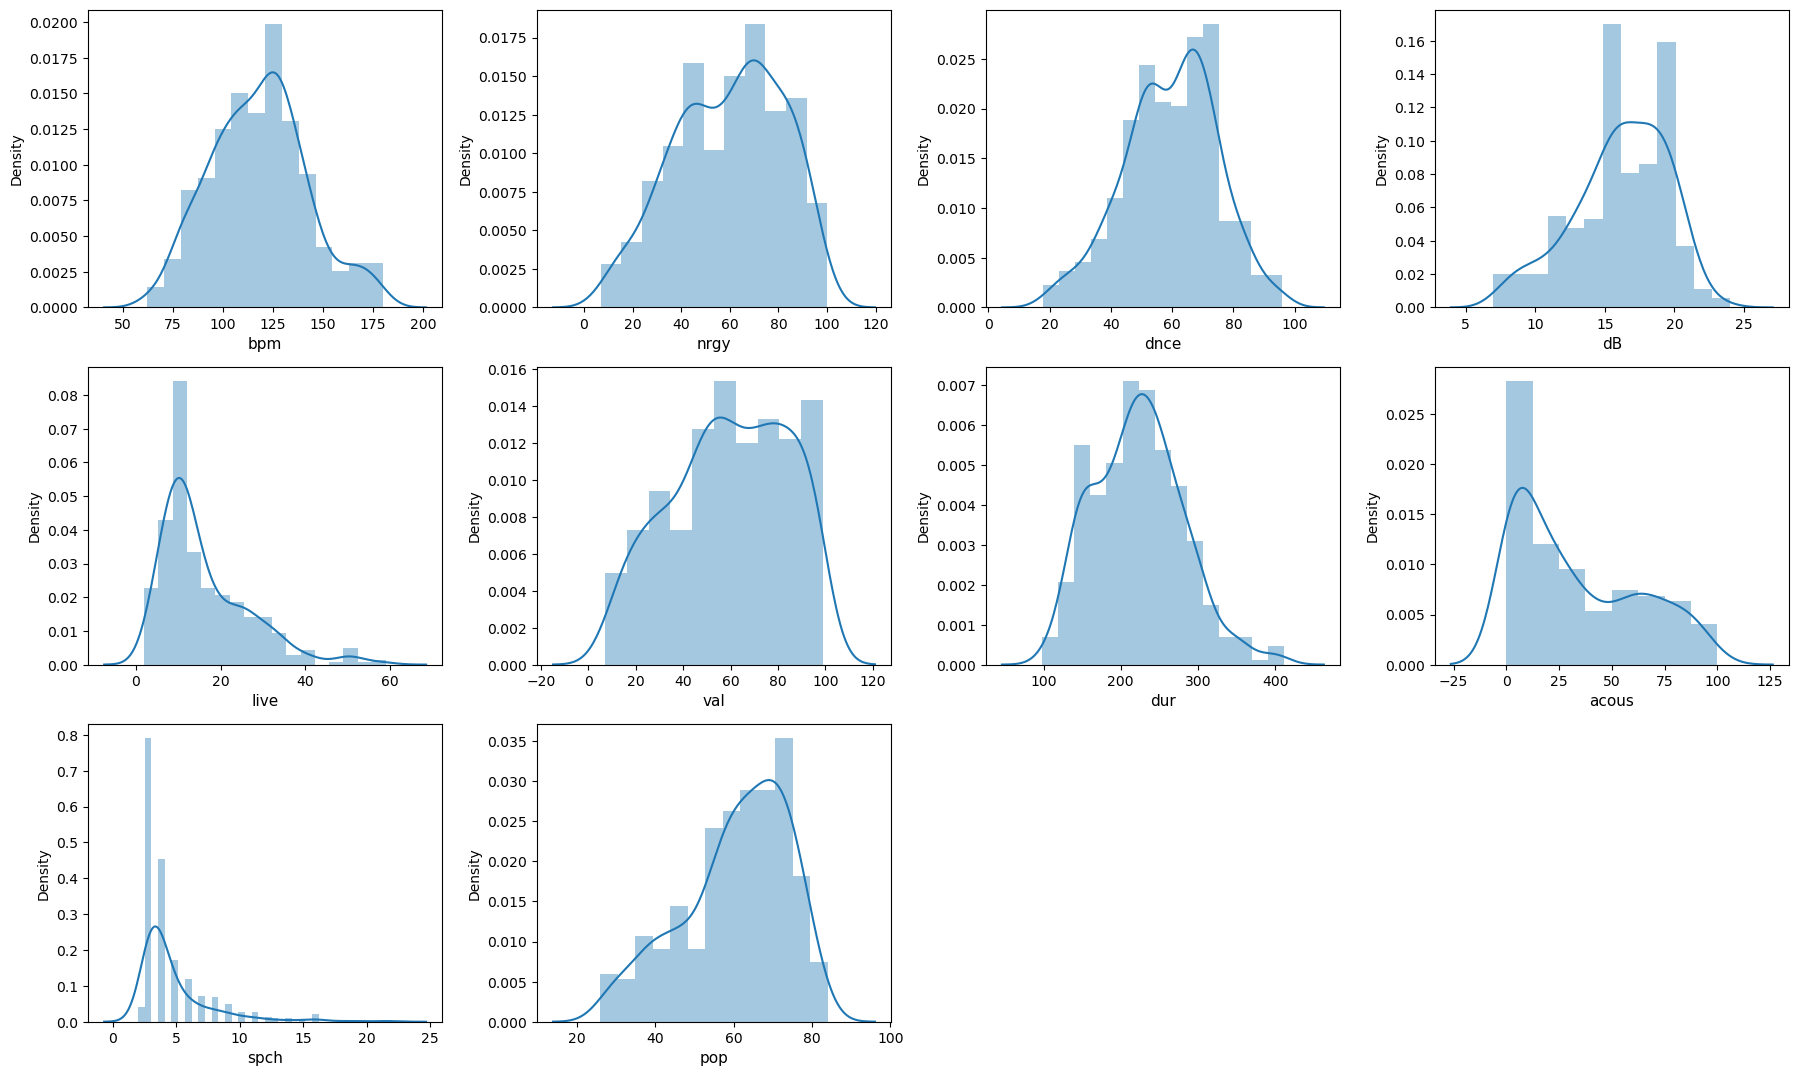

In [78]:
k = 0
plt.figure(figsize=(18, 14))
for i in numerical_columns:
    plt.subplot(4, 4, k + 1)
    sns.distplot(X[i])
    plt.xlabel(i, fontsize=11)
    k += 1
plt.tight_layout() 
plt.show()

##### The correlation amongst the features shows weak correlations. for the prediction of top genre, all the features will be used. Except ID.

## Chapter 5: Data Transformation


From analysis above, we realize that this classification problem is much harder than the regression problem since we have limited sample size. We have tried many approach including One-hot, Lable Encoder and Demensional Reduction to help getting a good training dataset.  
But finally we have choosen Lable Encoder.

### 1: An attempt on One-hot encoding

A consideration was made to apply one-hot encoding to certain character numerical values such as "dB", "bpm", "nrgy", and "acous" in the dataset. The intention was to convert them into binary (0 or 1) values by dividing them into categories and then train the model based on these encoded values. However, this approach did not yield satisfactory performance since those are continuous numerical variable. Encoding them one-hot can result in information loss and dimensional explosion, which in turn affects the performance of the model.

In [79]:
# clas_dat_encoded = pd.get_dummies(clas_dat_drop, columns=['title','artist','top genre'])
# clas_dat_encoded = clas_dat_encoded.astype(int)
# clas_dat_encoded

### 2：Lable Encoder handling class imbalance in the dataset

For classes with fewer than 2 samples, a duplication strategy (sampling_strategy=2) is applied, while for other classes, the original sample count is maintained. Ultimately, this process generates a new training set and target variable ('top genre') is encoded using LabelEncoder to convert it into numerical labels.  
This method help us generate a new training set, X_train_ros and y_train_ros, which have been oversampled and are used for model training.

The benefits of oversampling for this problem, is because we have many value in "top genre" have only occured once. By this step we can ensuring a more balanced distribution of classes and the model can learn from a more representative dataset, leading to better generalization performance on unseen data.

In [80]:
label_encoder = LabelEncoder()
X_train_last = clas_dat_drop.drop(columns=['Id', 'title', 'artist', 'year', 'top genre'])
y_train_last = label_encoder.fit_transform(clas_dat_drop['top genre'])

In [81]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


y_counts = Counter(y_train_last)
sampling_strategy = {}
for class_label, count in y_counts.items():
    if count < 2:
        sampling_strategy[class_label] = 1
    else:
        sampling_strategy[class_label] = count
        
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_last, y_train_last)

In [82]:
# Check encoded
X_train_ros

bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop
0    107    31    45  17    13   28  150     75     3   44
1    114    44    53  17    13   47  139     49     3   37
2    105    36    63  16    13   67  245     11     3   77
3    170    28    47   9    13   33  232     25     3   67
4    121    47    56  17    15   40  193     45     3   63
..   ...   ...   ...  ..   ...  ...  ...    ...   ...  ...
413   80    22    18   8    10   16  214     92     4   45
414  148    81    53  12    23   96  147     50     3   50
415  168    55    73  17    20   61  289     23    14   77
416  165    87    64  20     6   88  191      5     8   62
417  105    73    68  17    14   94  281     11     2   59

[418 rows x 10 columns]

## 3: Demensional Reduction

After recognizing that the dataset has a high number of features relative to the number of samples, we've found the presence of the curse of dimensionality and we decided to explore dimensionality reduction techniques. Despite conducting parameter testing in PCA, we were unable to identify suitable parameters for effective dimensionality reduction. Upon reevaluation of the dataset, it became apparent that the issue may stem from the characteristics of the dataset itself. It appears that the dataset may have been selected or prepared in a manner that resulted in information loss or an increased potential for overfitting.  

In [83]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X, y)
# plot_pca = plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
# handles, labels = plot_pca.legend_elements()
# lg = plt.legend(handles, y_org.unique(), loc = 'center right', bbox_to_anchor=(1, 0.8))
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# _ = plt.title("PCA")

In [84]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
# x_tsne = tsne.fit_transform(X, y)
# plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
# handles, labels = plot_tsne.legend_elements()
# lg = plt.legend(handles, y_org.unique(), loc = 'center right', bbox_to_anchor=(1, 0.8))
# plt.xlabel("T-SNE 1")
# plt.ylabel("T-SNE 2")
# _ = plt.title("T-SNE")

## Chapter 6: MODEL BUILDING

In order to predict a categorical value, we employed a Label Encoder to transform it into numerical form, facilitating the training process. Subsequently, after making predictions, we decoded the numerical outputs to their original categorical representations. Given the specific characteristics of our dataset, we opted to employ a diverse set of machine learning algorithms, including Decision Trees, Random Forests, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM). Each of these algorithms offers unique advantages and may excel in different aspects of our problem, thereby allowing us to explore a range of modeling approaches and potentially discover the most effective solution.

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = clas_dat_drop.drop(columns=['Id', 'title', 'artist', 'year', 'top genre'])
X_encoded = pd.get_dummies(X)
target_genre = clas_dat_drop['top genre']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target_genre)
X_train_genr, X_test_genr, y_train_genr, y_test_genr = train_test_split(X_encoded, y, test_size=0.256, random_state=42)
print(X_train_genr.shape) 
print(X_test_genr.shape)

(310, 10)
(108, 10)


### 1: DECISION TREE CLASSIFIER
Decision trees in machine learning offer a potent approach for decision-making since they systematically present the problem and its various potential outcomes. However, a prevalent issue with classic decision trees is their tendency to over-fit but it cant be denied that it is a good model for classification problem

In [86]:
# Instantiating the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_genr,y_train_genr)

DecisionTreeClassifier()

In [87]:
#Predicting and evaluating Train set
dt_train_pred = dt_model.predict(X_train_genr)
print("Train accuracy of decision tree:",dt_model.score(X_train_genr,dt_train_pred))

Train accuracy of decision tree: 1.0


In [88]:
dt_pred_genr = dt_model.predict(X_test_genr)
# # Decode the numeric genre labels back to genre names
# y_pred_genr_decodedd = label_encoder.inverse_transform(dt_pred_genr)
# y_test_genr_decodedd = label_encoder.inverse_transform(y_test_genr)

# # Model evaluation
dt_Test_accuracy = accuracy_score(y_test_genr, dt_pred_genr)
print("Test accuracy of decision tree:", dt_Test_accuracy)

Test accuracy of decision tree: 0.2222222222222222


### 2: RANDOM FOREST CLASSIFIER

Random Forest is a commonly used ensemble learning technique in machine learning. It is known for delivering satisfactory results even without hyperparameter adjustment. Additionally, it is capable of handling both classification and regression issues. To mitigate overfitting, random forest models employ a technique where they randomly choose and train numerous sub-samples, each consisting of multiple deep decision trees which helps to solve the problem of overfitting that comes wit decision tree. 

In [89]:
rf_model = RandomForestClassifier(n_estimators=150,random_state = 3) #model instatiation

rf_model.fit(X_train_genr,y_train_genr) # model fitting

RandomForestClassifier(n_estimators=150, random_state=3)

In [90]:
#Predicting and evaluating Train set
rf_train_pred = rf_model.predict(X_train_genr)
print("Train accuracy of decision tree:",rf_model.score(X_train_genr,rf_train_pred))

Train accuracy of decision tree: 1.0


In [91]:
#Predicting and evaluating Test set
rf_pred_genr = rf_model.predict(X_test_genr)

# # Decode the numeric genre labels back to genre names
# rf_pred_genr_decoded = label_encoder.inverse_transform(rf_pred_genr)
# rf_test_genr_decoded = label_encoder.inverse_transform(y_test_genr)

# Model evaluation
Rf_Test_accuracy = accuracy_score(y_test_genr, rf_pred_genr)
print("Test accuracy of decision tree:", Rf_Test_accuracy)

Test accuracy of decision tree: 0.3425925925925926


In [92]:
k = 5
cv_result = cross_val_score(rf_model,X_train_genr,y_train_genr,cv=k) 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.27419355 0.32258065 0.24193548 0.22580645 0.20967742]
Cross_val scores average:  0.25483870967741934


### 3: K Nearest Neighbour
KNN is a type of machine learning algorithm primarily employed for classification tasks. The data point is categorized based on the classification of its neighbor. The KNN algorithm is frequently employed because of its simplicity in interpretation and efficient computation speed.

In [93]:
#Model Fitting
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_genr,y_train_genr)

KNeighborsClassifier(n_neighbors=3)

In [94]:
#Predicting and evaluating Train set
knn_train_pred = knn_model.predict(X_train_genr)
print("Train accuracy of decision tree:",knn_model.score(X_train_genr,knn_train_pred))

Train accuracy of decision tree: 1.0


In [95]:
#Predicting and evaluating Test set
knn_pred_genr = knn_model.predict(X_test_genr)

# # Decode the numeric genre labels back to genre names
# knn_pred_genr_decoded = label_encoder.inverse_transform(knn_pred_genr)
# knn_test_genr_decoded = label_encoder.inverse_transform(y_test_genr)

# Model evaluation
Knn_Test_accuracy = accuracy_score(y_test_genr, knn_pred_genr)
print("Test accuracy of decision tree:", Knn_Test_accuracy)

Test accuracy of decision tree: 0.24074074074074073


In [96]:
k = 5
cv_result = cross_val_score(knn_model,X_train_genr,y_train_genr,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.14516129 0.14516129 0.16129032 0.20967742 0.11290323]
Cross_val scores average:  0.15483870967741936


### 4: SUPPORT VECTOR CLASSIFIER
The Support Vector Machine (SVM) is a highly efficient and straightforward approach mostly employed for solving classification tasks. The objective of the SVM algorithm is to identify a hyperplane in an N-dimensional space (where N is the number of features) that effectively separates the data points into various classes.

In [97]:
#Model fitting
svm_model = SVC(random_state=1)  #kernel='rbf'
svm_model.fit(X_train_genr,y_train_genr)

SVC(random_state=1)

In [98]:
#Predicting and evaluating Train set
svm_train_pred = svm_model.predict(X_train_genr)
print("Train accuracy of decision tree:",svm_model.score(X_train_genr,svm_train_pred))

Train accuracy of decision tree: 1.0


In [99]:
#Predicting and evaluating Test set
svm_pred_genr = svm_model.predict(X_test_genr)

# # Decode the numeric genre labels back to genre names
# svm_pred_genr_decoded = label_encoder.inverse_transform(svm_pred_genr)
# svm_test_genr_decoded = label_encoder.inverse_transform(y_test_genr)

# Model evaluation
svm_Test_accuracy = accuracy_score(y_test_genr, svm_pred_genr)
print("Test accuracy of decision tree:", svm_Test_accuracy)

Test accuracy of decision tree: 0.3148148148148148


In [100]:
k = 5
cv_result = cross_val_score(svm_model,X_train_genr,y_train_genr,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.20967742 0.25806452 0.20967742 0.20967742 0.22580645]
Cross_val scores average:  0.22258064516129034


In [101]:
model_perform = pd.DataFrame({'Model':['DecisionTreeClassifier','RandomForestClassifier','KNearestNeighbour','SupportVectorClasssifier'],
                                 'Accuracy':[dt_Test_accuracy,Rf_Test_accuracy,Knn_Test_accuracy,svm_Test_accuracy],'Cross_val score':[0.2037037,0.25483870,0.154838709,0.222580645]})
model_perform.sort_values(by = "Accuracy",ascending=False)

Model  Accuracy  Cross_val score
1    RandomForestClassifier  0.342593         0.254839
3  SupportVectorClasssifier  0.314815         0.222581
2         KNearestNeighbour  0.240741         0.154839
0    DecisionTreeClassifier  0.222222         0.203704

##### The random forest classifieer has the highest accuracy, hence it will be used for prediction

## Chapter 7: Predicting with the test data

In [102]:
CTest_data = pd.read_csv('CS98XClassificationTest.csv') #Loading test set
X_test_last = CTest_data.drop(columns=['Id', 'title', 'artist', 'year']) 

In [103]:
# Predicting with RandomForest Classifier, hyperparemeter with 150, 1500, 500, 100, 50
rf_model = RandomForestClassifier(n_estimators=100,random_state = 3)
rf_model.fit(X_train_ros, y_train_ros)
rf_pred_genr = rf_model.predict(X_test_last)

In [104]:
rf_pred_genr_decoded = label_encoder.inverse_transform(rf_pred_genr)

In [105]:
result_last = pd.DataFrame({"Id": CTest_data["Id"],"top genre":rf_pred_genr_decoded})
result_last

Id        top genre
0    454        dance pop
1    455  adult standards
2    456  adult standards
3    457        eurodance
4    458  adult standards
..   ...              ...
108  563        dance pop
109  564  bubblegum dance
110  565       album rock
111  566  bubblegum dance
112  567       album rock

[113 rows x 2 columns]

In [106]:
result_last.to_csv("top_genrr.csv",index=False)

In [107]:
# check the output format
result_last

Id        top genre
0    454        dance pop
1    455  adult standards
2    456  adult standards
3    457        eurodance
4    458  adult standards
..   ...              ...
108  563        dance pop
109  564  bubblegum dance
110  565       album rock
111  566  bubblegum dance
112  567       album rock

[113 rows x 2 columns]

## Chapter 8 Summary and Limitation

### 1: Summary
The Random Forest algorithm was utilized to make predictions, varying the hyperparameter n_estimators across several values: 50, 100, 150, 500 and 1500. Among these configurations, the most favorable outcome was observed when n_estimators was set to 100, resulting in a Kaggle score of 0.32142. The scores obtained for each configuration were as follows: 0.2321,0.32142, 0.30357, 0.28571,  0.26785, respectively.

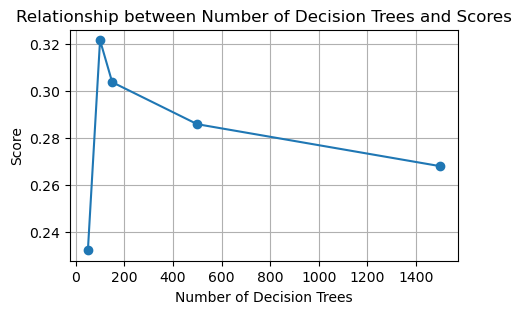

In [108]:
def plot_scores(num_trees, scores, width=8, height=6):
    plt.figure(figsize=(width, height))
    plt.plot(num_trees, scores, marker='o', linestyle='-')
    plt.title('Relationship between Number of Decision Trees and Scores')
    plt.xlabel('Number of Decision Trees')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()
    
num_trees = [50, 100, 150, 500, 1500]
scores = [0.2321,0.32142, 0.30357, 0.28571,  0.26785]

plot_scores(num_trees, scores, width=5, height=3)

### 2: Limitation for the problem

- The model currently does not including the title and artist of the song data, but we suspect that they may have an impact on the prediction. Unfortunately, we lack a robust method to handle this information effectively. Thus we believe that the model's performance could be enhanced by doing that.  

- We have addressed outliers throughout the entire dataset; however, certain genres appear to be particularly significant for further prediction. Thus, it maybe better remove the outliner by genre.  
 
- Given the small sample size and imbalanced nature of the data, we think the need for a more balanced data distribution is essential to improve the prediction model. Therefore, we intend to explore strategies to augment the dataset with additional instances, especially for underrepresented genres, to achieve a more representative and reliable model.
    